In [20]:
import pandas as pd
import quandl
import numpy as np
import math
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression   

df = quandl.get('WIKI/GOOGL')  # get historic of a stock

df = df[["Adj. Open","Adj. High","Adj. Low","Adj. Close","Adj. Volume"]]

df["HL_PCT"] = ((df["Adj. High"] - df["Adj. Close"]) / df["Adj. Close"]) * 100     # High / Close Percentage
df["PCT_change"] = ((df["Adj. Close"] - df["Adj. Open"]) / df["Adj. Open"]) * 100  # Close/Open Precentage

df=df[["Adj. Close","HL_PCT","PCT_change","Adj. Volume"]]

forecast_col = "Adj. Close";
df.fillna(-99999, inplace = True)

forecast_out = int(math.ceil(0.01*len(df)))
# print ("forecast_out =" + str(forecast_out))

df["label"] = df[forecast_col].shift(-forecast_out)

df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.639972
2004-08-20,54.322689,0.710922,7.227007,22834300.0,69.078238
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,67.839414
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,68.912727
2004-08-25,53.164113,1.886792,1.183658,9188600.0,70.668146
2004-08-26,54.122070,0.037068,2.820391,7094800.0,71.219849
2004-08-27,53.239345,2.326896,-1.803885,6211700.0,72.278116
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,74.810934
2004-08-31,51.343492,1.308977,0.048866,4917800.0,74.199045


In [19]:
# VERSION 1   
df1 = df
df1.dropna(inplace=True)
x = np.array(df1.drop(['label'], 1))  # columns without label 
y = np.array(df1['label'])            # array from column label

x = preprocessing.scale(x)

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2) # shuffle and use 20% data as test data 

clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy =  clf.score(x_test, y_test)

accuracy

0.97367011630304201

[[-1.43774133  2.33999509  0.23160091  4.42890936]
 [-1.42100579 -0.31238008  4.8238418   1.7960457 ]
 [-1.41871842  2.35490245 -0.80157921  1.24374595]
 ..., 
 [ 2.58177629 -0.62942701  0.250499   -0.83901211]
 [ 2.58905653 -0.62908909  0.12659972 -0.80537782]
 [ 2.54345043 -0.45723445 -0.17731495 -0.75630238]] [   69.63997192    69.0782379     67.83941377 ...,  1032.72        1044.57
  1049.38      ]
[ 1021.40612651  1001.05573086  1004.88469331  1007.7730653   1007.07190634
  1047.67589503  1049.22509336  1049.38026936  1058.85973687  1059.69189453
  1066.76480422  1059.25199322  1069.23096588  1064.26005942  1060.99966374
  1057.82458949  1058.52429923  1053.19273816  1065.19993674  1052.08233672
  1051.42845907  1067.1961254   1068.85899909  1073.44102929  1088.75107769
  1079.43232747  1052.79156323  1052.28959005  1041.06518376  1027.48603923
  1035.23743734  1049.06686779  1061.11925281  1065.88399508] ['2017-10-20T00:00:00.000000000' '2017-10-23T00:00:00.000000000'
 '2017-10-2

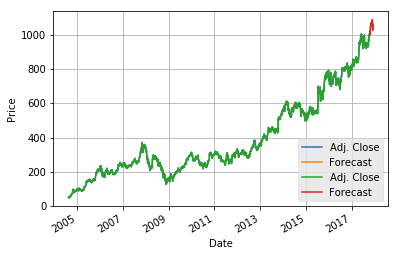

In [21]:
# VERSION 2
import datetime 
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df2 = df
x = np.array(df2.drop(['label'], 1))  # columns without label 
y = np.array(df2['label'])            # array from column label

x = preprocessing.scale(x)
x_lately = x[-forecast_out:]
x = x[:-forecast_out]

d = np.array ( df2.index.values )
d = d[-forecast_out:]

df2.dropna(inplace=True)
y = np.array(df2['label']) 

print(x,y)

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2) # shuffle and use 20% data as test data 

clf = LinearRegression()
clf.fit(x_train, y_train)

accuracy =  clf.score(x_test, y_test)

forecast_set = clf.predict(x_lately)

print (forecast_set, d, accuracy, forecast_out )

df2['Forecast'] = np.nan
curr_date = df2.iloc[-1].name

for i in range(len(forecast_set) - 1):
    curr_date += datetime.timedelta(days=1)
    df2.loc[d[i]] = [np.nan for _ in range(len(df2.columns)-1)] + [forecast_set[i]]

print(df2.tail(50), forecast_set) 
   
df2["Adj. Close"].plot()
df2['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [22]:
xs = np.array([1,2,3,4,5,6] , dtype=np.float64)
ys = np.array([5,4,6,5,6,7] , dtype=np.float64)

print (xs, ys, xs-ys) 

[ 1.  2.  3.  4.  5.  6.] [ 5.  4.  6.  5.  6.  7.] [-4. -2. -3. -1. -1. -1.]
